<div align="center">

# 💙 Job Salaries in 2025

Discover pay trends in **AI, ML, and Data Science jobs worldwide**.

</div>

---

## 💡 About the Dataset

What are data science professionals really earning in 2025?  
This dataset offers a comprehensive look into global salary trends for roles in **Data Science**, **Machine Learning**, and **Artificial Intelligence**.

It is carefully curated using a combination of market research and publicly available sources—including the **AIJobs salary survey (CC0 license)**, **365DataScience**, **Payscale**, **KDnuggets**, **ZipRecruiter**, and more—reflecting **real-world compensation patterns from around the globe**.

---

## 🌟 Why This Dataset Matters

Whether you're a data scientist, AI practitioner, student, recruiter, or industry researcher, this dataset can help with:

- Salary prediction and ML modeling  
- Global market benchmarking  
- Career decision-making and negotiation  
- Remote work trend analysis  
- Business intelligence dashboards and visualizations  

---

## 📄 About This File

This dataset captures **real-world salary data** for jobs in **Data Science**, **Artificial Intelligence**, and **Machine Learning** from **2020 to 2025**. Each row represents a reported salary, enriched with attributes like:

- Job title  
- Experience level  
- Company size  
- Remote work ratio  
- Geographic context  

It is ideal for analyzing salary trends over time, comparing roles across countries, and exploring compensation differences by experience, work setting, and more.

---

## 🗂 Column Descriptions

| Column                 | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| `work_year`            | Year the salary was reported (2020–2025).                                   |
| `experience_level`     | Seniority level: **EN** (Entry), **MI** (Mid), **SE** (Senior), **EX** (Executive). |
| `employment_type`      | Contract type: **FT** (Full-time), **PT** (Part-time), **CT** (Contract), **FL** (Freelance). |
| `job_title`            | Specific role title (e.g., *Data Scientist*, *ML Engineer*, *AI Specialist*). |
| `salary`               | Gross annual salary in the original currency (before taxes).                |
| `salary_currency`      | Original currency (e.g., USD, EUR, INR).                                    |
| `salary_in_usd`        | Salary converted to USD using 2025 exchange rates.                           |
| `employee_residence`   | Employee’s country (ISO 3166-1 alpha-2 code).                                |
| `remote_ratio`         | Remote work percentage: 0 = On-site, 50 = Hybrid, 100 = Fully remote.       |
| `company_location`     | Company headquarters country (ISO 3166-1 alpha-2 code).                      |
| `company_size`         | Company size: **S** (1–50), **M** (51–500), **L** (501+ employees).        |


---

# 🚀 Goal of the Analysis

We aim to uncover global salary patterns and trends across the Data Science and AI/ML industry by answering questions like:

- How do salaries differ by job title and experience level?
- Which countries or regions offer the highest average salaries?
- How does remote work affect compensation?
- Are there differences across company sizes?
- How have salaries evolved from 2020 to 2025?

# ✨ Next Steps

We will explore:

- Salary distribution (with log scale for clarity)
- Salary comparison by experience level, job title, and company size
- Geographic patterns in salaries and remote work


*🧠 Let’s explore the data and uncover insights that drive the future of AI and Data Science!*

</div>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load data
df = pd.read_csv("dataset_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516.0,USD,348516.0,US,0,US,M
1,2025,EX,FT,Head of Data,232344.0,USD,232344.0,US,7,US,M
2,2025,SE,FT,Data Scientist,145400.0,USD,145400.0,US,0,US,M
3,2025,SE,FT,Data Scientist,81600.0,USD,81600.0,US,0,US,M
4,2025,MI,FT,Engineer,160000.0,USD,160000.0,US,100,US,M


In [4]:
# Display DataFrame shape
df.shape

(151445, 11)

In [5]:
# Display basic info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           151445 non-null  int64  
 1   experience_level    151445 non-null  object 
 2   employment_type     151445 non-null  object 
 3   job_title           150693 non-null  object 
 4   salary              149931 non-null  float64
 5   salary_currency     151445 non-null  object 
 6   salary_in_usd       151445 non-null  float64
 7   employee_residence  150696 non-null  object 
 8   remote_ratio        151445 non-null  int64  
 9   company_location    151445 non-null  object 
 10  company_size        151445 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 12.7+ MB


In [6]:
# Create a summary table for missing values
summary = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Missing Count': df.isnull().sum()
})

# Add percentage of missing values
summary['Missing %'] = (summary['Missing Count'] / len(df) * 100).round(2)

# Display the summary table
summary

,Column,Non-Null Count,Missing Count,Missing %
work_year,work_year,151445,0,0.00
experience_level,experience_level,151445,0,0.00
employment_type,employment_type,151445,0,0.00
job_title,job_title,150693,752,0.50
salary,salary,149931,1514,1.00
salary_currency,salary_currency,151445,0,0.00
salary_in_usd,salary_in_usd,151445,0,0.00
employee_residence,employee_residence,150696,749,0.49
remote_ratio,remote_ratio,151445,0,0.00
company_location,company_location,151445,0,0.00


<h3 style="text-align:center; color:blue;">📝 Dataset Summary (Pre-Cleaning)</h3>

<ul>
<li>The dataset has <b>151,445 rows</b> and <b>11 columns</b>.</li>
<li>Columns with missing values:
    <ul>
        <li><b>job_title</b></li>
        <li><b>salary</b></li>
        <li><b>employee_residence</b></li>
    </ul>
</li>
</ul>

<p style="color:blue;">💡 <b>Note:</b> This is the raw dataset before cleaning. We will address missing values, invalid country codes, and outliers in the next steps.</p>


In [8]:
# ----------------------------
# Handling Missing Values
# ----------------------------

# 1. job_title: fill missing with 'Unknown'
df['job_title'] = df['job_title'].fillna('Unknown')

# 2. salary: fill missing with the median salary
df['salary'] = df['salary'].fillna(df['salary'].median())

# 3. employee_residence: 
#  If missing and remote_ratio is 0, assume the employee lives in the company location
mask = df['employee_residence'].isna() & (df['remote_ratio'] == 0)
df.loc[mask, 'employee_residence'] = df.loc[mask, 'company_location']

#  Fill any remaining missing values with the most frequent country (mode)
df['employee_residence'] = df['employee_residence'].fillna(df['employee_residence'].mode()[0])

# ----------------------------
# Verify that no missing values remain
# ----------------------------
print(df.isna().sum())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [9]:
# Check the data types of each column
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

In [10]:
# unique value counts for each column
for column in df.columns:
    print(f"Column {column}:")
    print(df[column].value_counts())
    print("—" * 40)  

Column work_year:
work_year
2025    78726
2024    62241
2023     8524
2022     1661
2021      218
2020       75
Name: count, dtype: int64
————————————————————————————————————————
Column experience_level:
experience_level
SE            85765
MI            45196
EN            13368
EX             4087
executivee      621
Senior          613
EXX             605
mi              597
Enn             593
Name: count, dtype: int64
————————————————————————————————————————
Column employment_type:
employment_type
FT            149038
CT               462
PT               415
Freelanc         339
part-time        310
F/T              301
Contractor       284
FullTime         280
FL                16
Name: count, dtype: int64
————————————————————————————————————————
Column job_title:
job_title
Data Scientist                      18504
Software Engineer                   16677
Data Engineer                       16093
Data Analyst                        13589
Engineer                            1083

<h3 style="text-align:center; color:blue;">🔍 Observations on Dataset Columns (Pre-Cleaning)</h3>

<ul style="color:black;">
<li><b>work_year:</b> Mostly valid values 2020–2025, looks fine.</li>
<li><b>experience_level:</b> Contains some incorrect or inconsistent values, e.g., <code>executivee</code>, <code>EXX</code>, <code>mi</code>, <code>Enn</code>, <code>Senior</code> (standard: EN, MI, SE, EX).</li>
<li><b>employment_type:</b> Some wrong or inconsistent entries, e.g., <code>Freelanc</code>, <code>F/T</code>, <code>Contractor</code>, <code>FullTime</code>, <code>part-time</code>, <code>FL</code> (standard: FT, PT, CT, FL).</li>
<li><b>job_title:</b> Mostly fine, but many rare or misformatted titles. Could standardize capitalization and spacing.</li>
<li><b>salary:</b> Mostly numeric, no obvious errors, but check outliers (very low or very high values).</li>
<li><b>salary_currency:</b> Some inconsistencies, e.g., USD variants (<code>USD</code>, <code>US Dollars</code>, <code>usd</code>), EUR variants (<code>EUR</code>, <code>EURO</code>), INR variants (<code>Inr</code>, <code>INR</code>).</li>
<li><b>salary_in_usd:</b> Mostly fine, derived from salary and salary_currency.</li>
<li><b>employee_residence:</b> Mostly valid ISO codes, but check for any invalid/unexpected codes.</li>
<li><b>remote_ratio:</b> Mostly 0, 50, 100; some strange values like <code>-8</code>, <code>17</code>, <code>104</code>, <code>115</code>.</li>
<li><b>company_location:</b> Mostly valid ISO codes, some rare countries with very few entries.</li>
<li><b>company_size:</b> Inconsistent entries, e.g., Small, Medium, XL, Large, micro, XXL (standard: S, M, L).</li>
</ul>

<p style="color:blue;">💡 <b>Note:</b> These are observations before cleaning. Next steps include standardizing categories, correcting invalid codes and handling outliers.</p>



In [12]:
# ----------------------------
# Standardizing values
# ----------------------------

# experience_level: map inconsistent values to standard codes
experience_map = {
    'EN': 'EN', 'MI': 'MI', 'SE': 'SE', 'EX': 'EX',
    'executivee': 'EX', 'EXX': 'EX', 'mi': 'MI', 'Enn': 'EN', 'Senior': 'SE'}
df['experience_level'] = df['experience_level'].map(lambda x: experience_map.get(x, x))

# employment_type: standardize to FT, PT, CT, FL
employment_map = {
    'FT': 'FT', 'PT': 'PT', 'CT': 'CT', 'FL': 'FL',
    'Freelanc': 'FL', 'F/T': 'FT', 'Contractor': 'CT', 'FullTime': 'FT', 'part-time': 'PT'}
df['employment_type'] = df['employment_type'].map(lambda x: employment_map.get(x, x))

# company_size: standardize to S, M, L
company_size_map = {
    'S': 'S', 'M': 'M', 'L': 'L',
    'Small': 'S', 'Medium': 'M', 'Large': 'L', 'XL': 'L', 'micro': 'S', 'XXL': 'L'
}
df['company_size'] = df['company_size'].map(lambda x: company_size_map.get(x, x))

# salary_currency: standardize common variants
currency_map = {
    'USD': 'USD', 'US Dollars': 'USD', 'usd': 'USD',
    'EUR': 'EUR', 'EURO': 'EUR',
    'INR': 'INR', 'Inr': 'INR'
}
df['salary_currency'] = df['salary_currency'].map(lambda x: currency_map.get(x, x))

# remote_ratio: correct invalid values by clipping to 0–100
# Function to round remote_ratio to nearest valid value: 0, 50, 100
def fix_remote_ratio(x):
    if x < 25:
        return 0
    elif 25 <= x < 75:
        return 50
    else:
        return 100

df['remote_ratio'] = df['remote_ratio'].apply(fix_remote_ratio)

# ----------------------------
# Check unique values after cleaning
# ----------------------------
print("\nUnique experience levels:", df['experience_level'].unique())
print("Unique employment types:", df['employment_type'].unique())
print("Unique company sizes:", df['company_size'].unique())
print("Unique salary currencies:", df['salary_currency'].unique())
print("Unique remote_ratio values:", list(df['remote_ratio'].unique()))



Unique experience levels: ['EX' 'SE' 'MI' 'EN']
Unique employment types: ['FT' 'FL' 'PT' 'CT']
Unique company sizes: ['M' 'L' 'S']
Unique salary currencies: ['USD' 'EUR' 'GBP' 'CAD' 'INR' 'AUD' 'PLN' 'CHF' 'SGD' 'CZK' 'NOK' 'MXN'
 'PHP' 'JPY' 'HUF' 'TWD' 'BRL' 'ZAR' 'DKK' 'ILS' 'TRY' 'SEK' 'NZD' 'HKD'
 'THB' 'CLP']
Unique remote_ratio values: [0, 100, 50]


<h3 style="text-align:center; color:blue;">🔹 Needs Further Checking</h3>

- **job_title:** Mostly fine, but many rare or misformatted titles. Could standardize capitalization and spacing.  
- **salary:** Mostly numeric, no obvious errors, but check outliers (very low or very high values).  
- **salary_in_usd:** Mostly fine, derived from salary and salary_currency.  
- **employee_residence:** Mostly valid ISO codes, but check for any invalid or unexpected codes.  
- **company_location:** Mostly valid ISO codes, some rare countries with very few entries.  

<p style="color:blue;">💡 <b>Note:</b> These columns require further review and cleaning before analysis.</p>



In [14]:
# -------------------------------
# job_title: Check for misformatted or rare titles
# -------------------------------
# Count of unique job titles
print("Number of unique job titles:", df['job_title'].nunique())

# Show rare job titles that occur only once or twice
rare_titles = df['job_title'].value_counts()[df['job_title'].value_counts() <= 2]
print("Rare job titles (occurring <=2 times):")
print(rare_titles)

Number of unique job titles: 425
Rare job titles (occurring <=2 times):
job_title
Business Intelligence Data Analyst    2
Data Scientist Manager                2
Head of Business Intelligence         2
Cloud Architect                       2
Alternance                            2
                                     ..
Lead AI Engineer                      1
AI Software Development Engineer      1
CRM Data Analyst                      1
Technical Project Manager             1
Business Development Manager          1
Name: count, Length: 94, dtype: int64


In [15]:
# -------------------------------
# salary: Check numeric consistency and outliers
# -------------------------------
# Basic statistics
print("📊 Basic salary statistics (original currency):")
print(df['salary'].describe())
print("\n")

# Lowest 10 salaries (likely entry-level or low-cost countries)
lowest_salaries = df[df['salary_in_usd'] < 30000][
    ['salary_in_usd', 'salary_currency', 'job_title', 'employee_residence']
].sort_values(by='salary_in_usd').head(10)

# Highest 10 salaries (likely senior/executive roles or high-paying regions)
highest_salaries = df[df['salary_in_usd'] > 500000][
    ['salary_in_usd', 'salary_currency', 'job_title', 'employee_residence']
].sort_values(by='salary_in_usd', ascending=False).head(10)

# Display the tables
print("### 10 Lowest Salaries (USD)")
display(lowest_salaries)

print("\n### 10 Highest Salaries (USD)")
display(highest_salaries)


📊 Basic salary statistics (original currency):
count    1.514450e+05
mean     1.627083e+05
std      2.078890e+05
min      1.400000e+04
25%      1.063820e+05
50%      1.470000e+05
75%      1.980000e+05
max      3.040000e+07
Name: salary, dtype: float64


### 10 Lowest Salaries (USD)


,salary_in_usd,salary_currency,job_title,employee_residence
45209,12726.324407,EUR,Data Management Specialist,LV
70135,14113.529118,USD,Data Analyst,PH
148473,14367.888382,INR,Unknown,IN
150550,15000.000000,USD,Machine Learning Developer,TH
145711,15000.000000,USD,Business Intelligence Developer,GH
150847,15000.000000,USD,Data Analyst,ID
147922,15000.000000,USD,Staff Data Analyst,NG
97343,15107.000000,PHP,BI Analyst,PH
123670,15129.000000,EUR,Software Development Engineer,RO
63638,15157.000000,EUR,Data Analyst,FR



### 10 Highest Salaries (USD)


,salary_in_usd,salary_currency,job_title,employee_residence
71362,814956.014180,EUR,Data Engineer,AT
67596,814544.902141,USD,Machine Learning Scientist,US
30884,800000.000000,USD,Architect,US
54251,800000.000000,USD,Software Engineer,US
137715,800000.000000,USD,AI Architect,CA
76401,795533.682125,USD,Research Scientist,US
71363,793136.000000,EUR,Data Engineer,AT
138558,774000.000000,USD,Data Analyst,UK
142409,750000.000000,USD,Data Scientist,US
125611,750000.000000,USD,Data Scientist,US


<div style="text-align:center; color:blue; font-size:20px; font-weight:bold;">
💡 Salary Extremes & Visualization Plan
</div>

* The **lowest salaries** (around $12k–$15k USD) are realistic entry-level positions in countries with lower cost of living.  
* The **highest salaries** (~$750k–$815k USD) are senior/executive roles in major companies or high-paying regions.  

This is why using `salary_in_usd` is essential — raw `salary` in local currencies can be extremely misleading.


💡 **Plan:** We will keep all salary values in the dataset, including the extreme highs and lows, but **use a log scale for visualizations**.  

This approach allows us to:

- **Show all data** without removing realistic salaries from low-cost-of-living countries.  
- **Prevent extreme values** from distorting the visual trends.  
- Create **clear, professional plots** that highlight both typical salaries and outliers.


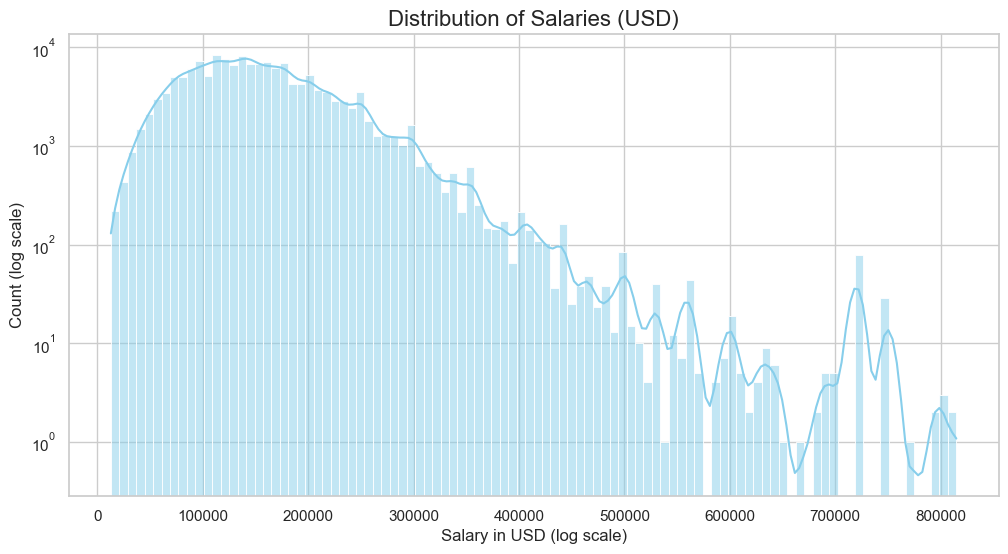

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(12,6))

# Plot salary_in_usd with log scale
sns.histplot(df['salary_in_usd'], bins=100, kde=True, color='skyblue')

# Set y-axis to log scale
plt.yscale('log')

# Titles and labels
plt.title('Distribution of Salaries (USD)', fontsize=16)
plt.xlabel('Salary in USD (log scale)', fontsize=12)
plt.ylabel('Count (log scale)', fontsize=12)

# Show plot
plt.show()


In [18]:
import pycountry

# -------------------------------
# employee_residence: Check for invalid ISO country codes
# -------------------------------
# List unique country codes
unique_residences = df['employee_residence'].unique()
print("Unique employee residence codes:", unique_residences)

# find non-standard or unexpected ISO codes
valid_codes = [c.alpha_2 for c in pycountry.countries]
invalid_residences = [code for code in unique_residences if code not in valid_codes]

print("Invalid employee residence codes:", invalid_residences)


Unique employee residence codes: ['US' 'CA' 'CA.' 'GB' 'NL' 'USA' 'FR' 'IN' 'DE' 'IND' 'ES' 'UK' 'IE' 'AU'
 'LT' 'EE' 'SK' 'DEU' 'CZ' 'UA' 'FI' 'CO' 'AR' 'AT' 'EG' 'SG' 'MX' 'IT'
 'PL' 'BE' 'CH' 'GR' 'NZ' 'HR' 'PR' 'PT' 'BR' 'PH' 'RO' 'ML' 'NO' 'CL'
 'MY' 'SV' 'DO' 'GT' 'CR' 'LV' 'ZA' 'JO' 'CY' 'TH' 'JM' 'JP' 'MT' 'MK'
 'SI' 'HK' 'LS' 'ID' 'PE' 'HU' 'PA' 'LU' 'DZ' 'KE' 'CD' 'SE' 'KR' 'TW'
 'TR' 'NG' 'DK' 'AE' 'BG' 'RS' 'EC' 'XK' 'ZM' 'AM' 'RW' 'IL' 'LB' 'PK'
 'HN' 'VE' 'BM' 'VN' 'GE' 'SA' 'OM' 'BA' 'UG' 'MU' 'QA' 'RU' 'TN' 'GH'
 'AD' 'MD' 'UZ' 'CF' 'KW' 'IR' 'AS' 'CN' 'BO' 'IQ' 'JE']
Invalid employee residence codes: ['CA.', 'USA', 'IND', 'UK', 'DEU', 'XK']


In [19]:
# Mapping of invalid codes to correct ISO alpha-2 codes
code_mapping = {
    'CA.': 'CA',
    'USA': 'US',
    'IND': 'IN',
    'UK': 'GB',
    'DEU': 'DE'
    # 'XK' can stay as is if we want to keep Kosovo
}

# Replace invalid codes
df['employee_residence'] = df['employee_residence'].replace(code_mapping)

# Verify all codes are now valid
valid_codes = [c.alpha_2 for c in pycountry.countries]
invalid_residences = [code for code in df['employee_residence'].unique() if code not in valid_codes]
print("Invalid employee residence codes after cleaning:", invalid_residences)


Invalid employee residence codes after cleaning: ['XK']


<div style="text-align:center; color:blue; font-size:20px; font-weight:bold;">
📝 Note on Kosovo (XK)
</div>

The ISO 3166-1 alpha-2 standard **does not officially assign the code “XK”,  but it is **widely used in datasets** to represent **Kosovo**.


💡 **Plan:** We will **keep the code `XK`** in the dataset to represent **Kosovo, since it is commonly used and does not affect analysis.

To ensure clarity in visualizations and reports, we will:

- Replace `XK` with the label **“Kosovo”** when creating plots or tables.  
- Keep the original ISO-like code (`XK`) in the dataset for consistency.  
- Add a short note in the documentation that `XK` refers to Kosovo.



In [21]:
# Create a copy of the employee_residence column for plotting
df['employee_residence'] = df['employee_residence'].replace({'XK': 'Kosovo'})

In [22]:
# -------------------------------
# company_location: Check for invalid ISO country codes
# -------------------------------
unique_locations = df['company_location'].unique()
invalid_locations = [code for code in unique_locations if code not in valid_codes]
print("Invalid company location codes:", invalid_locations)

Invalid company location codes: ['USA', 'IND', 'DEU', 'CA.', 'XK']


In [23]:
# -------------------------------
# Clean invalid company location codes
# -------------------------------

# Create mapping for invalid -> valid ISO codes
location_replacements = {
    'USA': 'US',
    'IND': 'IN',
    'DEU': 'DE',
    'CA.': 'CA',
    # Keep XK as Kosovo
}

# Replace invalid codes
df['company_location'] = df['company_location'].replace(location_replacements)

# Recheck if any invalid remain
invalid_locations_after = [code for code in df['company_location'].unique() if code not in valid_codes]
print("Invalid company location codes after cleaning:", invalid_locations_after)


Invalid company location codes after cleaning: ['XK']


In [24]:
df['company_location'] = df['company_location'].replace({'XK': 'Kosovo'})

In [25]:
# change object type to category
categorie = ["experience_level","employment_type","job_title","salary_currency", "employee_residence", "company_location", "company_size"]

for column in categorie:
    df[column] = df[column].astype("category")

print(df.dtypes)

work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                 float64
salary_currency       category
salary_in_usd          float64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object


<div style="text-align:center; color:blue; font-size:20px; font-weight:bold;">
✅ Final Data Quality Check
</div>

Before moving forward with analysis, we performed a thorough cleaning and validation of the dataset.
At this stage, the following points have been verified:

* No **missing values** remain in any column.
* All **categorical variables** (`experience_level`, `employment_type`, `company_size`, etc.) use standardized codes.
* **Salary values** have been checked for numeric consistency and realistic ranges.
* Both `employee_residence` and `company_location` contain only **valid ISO country codes** (with `XK` correctly labeled as *Kosovo*).
* The column `remote_ratio` now contains only **0, 50, or 100**.
* Outliers in `salary_in_usd` are **kept** for completeness but will be visualized on a **log scale** to prevent distortion.


In [27]:
# -------------------------------
# FINAL DATA QUALITY CHECK
# -------------------------------

# 1️⃣ Check for missing values
missing_summary = df.isnull().sum()
print("Missing values per column:\n", missing_summary[missing_summary > 0])

# 2️⃣ Confirm categorical columns contain valid standardized values
print("\nUnique values check:")
print("experience_level:", df['experience_level'].unique())
print("employment_type:", df['employment_type'].unique())
print("company_size:", df['company_size'].unique())
print("remote_ratio:", df['remote_ratio'].unique())

# 3️⃣ Check numeric columns for unrealistic or inconsistent values
print("\nSalary (USD) range:", df['salary_in_usd'].min(), "to", df['salary_in_usd'].max())
print("Salary statistics:\n", df['salary_in_usd'].describe())

# 4️⃣ Verify country codes for employee residence and company location
invalid_residences = [code for code in df['employee_residence'].unique() if code not in valid_codes and code != 'Kosovo']
invalid_locations = [code for code in df['company_location'].unique() if code not in valid_codes and code != 'Kosovo']
print("\nInvalid employee residence codes:", invalid_residences)
print("Invalid company location codes:", invalid_locations)

# 5️⃣ Check dataset shape after cleaning
print("\nFinal dataset shape:", df.shape)

# 6️⃣ Confirm data types
print("\nColumn data types:")
print(df.dtypes)


Missing values per column:
 Series([], dtype: int64)

Unique values check:
experience_level: ['EX', 'SE', 'MI', 'EN']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']
employment_type: ['FT', 'FL', 'PT', 'CT']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']
company_size: ['M', 'L', 'S']
Categories (3, object): ['L', 'M', 'S']
remote_ratio: [  0 100  50]

Salary (USD) range: 12726.324406826008 to 814956.0141797299
Salary statistics:
 count    151445.000000
mean     157536.593606
std       74307.820910
min       12726.324407
25%      105600.000000
50%      146000.000000
75%      198000.000000
max      814956.014180
Name: salary_in_usd, dtype: float64

Invalid employee residence codes: []
Invalid company location codes: []

Final dataset shape: (151445, 11)

Column data types:
work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                 float64
salary_currency       category
salary_in_usd          float6

In [28]:
# Display summary statistics for each column
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,151445.000000,1.514450e+05,151445.000000,151445.000000
mean,2024.435313,1.627083e+05,157536.593606,20.982205
std,0.671842,2.078890e+05,74307.820910,40.624727
min,2020.000000,1.400000e+04,12726.324407,0.000000
25%,2024.000000,1.063820e+05,105600.000000,0.000000
50%,2025.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.980000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,814956.014180,100.000000


<div style="text-align:center; color:blue; font-size:20px; font-weight:bold;">
🚀 Next Steps
</div>

Now that the dataset is clean and consistent, we can proceed with the **exploratory data analysis (EDA)** to uncover insights, such as:

* Distribution of salaries by **job title**, **experience level**, and **employment type**
* **Geographical salary differences** across countries and regions
* The impact of **remote work** and **company size** on salaries
* **Salary trends over time** (2020–2025)

---
